In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import mpld3
from bokeh.charts import BoxPlot
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

%matplotlib inline

# Random data

In [2]:
mu, sigma, n_test, n_card = 40, 5, 11, 15
df = pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
name = list()
for i in range(n_card):
    x = np.random.normal(mu, sigma, n_test) + 5*np.arange(n_test)
    df.loc[i] = x+i*4
    name.insert(i, 'Card'+str(i))
df.index = name
df

,A,B,C,D,E,F,G,H,I,J,K
Card0,44.455206,42.103567,55.343233,53.138215,61.660389,62.747174,72.225416,77.712102,82.603447,79.980079,86.786166
Card1,45.677553,50.188247,55.158072,51.645922,67.757699,67.157765,80.514456,79.656478,83.240342,88.987283,90.829430
Card2,53.816379,63.314331,54.006930,63.145326,64.152080,72.975631,75.118041,81.291291,95.462952,93.765036,96.798462
Card3,48.135909,52.970958,62.599586,63.351301,68.166437,74.226147,83.214090,79.908619,90.863976,95.338943,98.619626
Card4,54.209133,68.897518,68.156760,82.175219,81.722298,79.081095,86.642797,93.024270,89.327062,92.157274,104.400746
Card5,59.316317,70.057620,69.655980,68.299196,85.908409,85.526038,90.654459,97.492928,91.252955,98.222542,111.396979
Card6,64.143853,71.706037,75.721851,78.142254,75.700759,90.817475,93.722353,105.739491,105.915793,118.861599,115.895697
Card7,74.019218,73.920311,78.748572,87.754439,90.890045,88.379331,95.622640,97.945104,110.675388,114.922059,118.233087
Card8,80.864335,68.992101,79.303084,83.470611,91.029496,95.712107,98.331284,113.753300,116.128537,107.061054,132.450673
Card9,76.029830,77.251793,84.394293,92.276032,98.582080,103.671048,111.935439,114.415294,119.714983,115.638443,126.417025


# Normalize dataframe to mean per game

In [3]:
mean_per_game = df.mean('index')
df = df.div(mean_per_game)

# Sort cards by median
df['median'] = df.median('columns') # temp
df.sort_values(by=['median'], inplace = True)
df.drop('median', axis = 1, inplace = True)
df

,A,B,C,D,E,F,G,H,I,J,K
Card0,0.646983,0.571455,0.703941,0.641846,0.697395,0.682846,0.728694,0.739649,0.770643,0.723136,0.723795
Card1,0.664772,0.681185,0.701586,0.623821,0.766357,0.730844,0.812323,0.758155,0.776585,0.804574,0.757516
Card2,0.783221,0.859340,0.686944,0.762720,0.725576,0.794157,0.757878,0.773715,0.890615,0.847772,0.807298
Card3,0.700550,0.718954,0.796239,0.765208,0.770980,0.807766,0.839560,0.760555,0.847709,0.862002,0.822486
Card4,0.788937,0.935119,0.866923,0.992579,0.924300,0.860600,0.874153,0.885387,0.833371,0.833235,0.870700
Card5,0.863265,0.950864,0.885993,0.824973,0.971646,0.930737,0.914627,0.927919,0.851338,0.888074,0.929049
Card6,0.933523,0.973237,0.963148,0.943865,0.856195,0.988321,0.945580,1.006408,0.988134,1.074681,0.966568
Card7,1.077245,1.003291,1.001647,1.059969,1.027990,0.961788,0.964752,0.932223,1.032539,1.039062,0.986062
Card8,1.176866,0.936402,1.008700,1.008226,1.029567,1.041587,0.992080,1.082682,1.083414,0.967987,1.104636
Card9,1.106506,1.048508,1.073458,1.114585,1.114989,1.128200,1.129335,1.088983,1.116873,1.045539,1.054316


# Only median

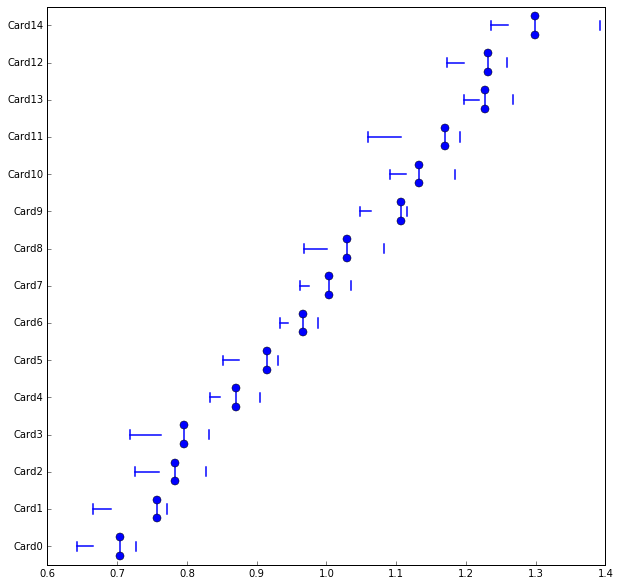

In [4]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
bp1 = ax1.boxplot(df.T.as_matrix(), notch=False, vert=False, whis=[0.5-0.68/2, 0.5+0.68/2], showbox = False, showfliers = False)
plt.setp(bp1['whiskers'], linestyle='-', linewidth=1.5)
plt.setp(bp1['caps'], color='Blue', linewidth=1.5)
plt.setp(bp1['medians'], color='Blue',  marker='o', markersize=8, linewidth=1.5)
ax1.set_yticklabels(df.index)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
plt.show()

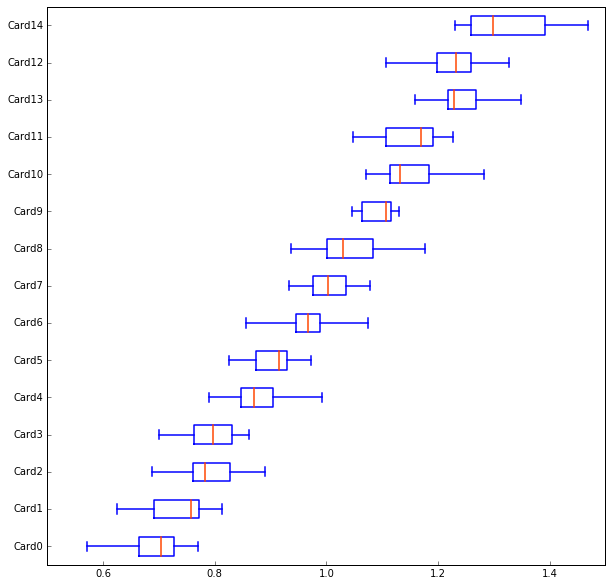

In [5]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
bp1 = ax1.boxplot(df.T.as_matrix(), notch=False, vert=False, whis='range')
plt.setp(bp1['whiskers'], linestyle='-', linewidth=1.5)
plt.setp(bp1['caps'], color='Blue', linewidth=1.5)
plt.setp(bp1['medians'], color='OrangeRed', linewidth=1.5)
plt.setp(bp1['boxes'], linewidth=1.5)
ax1.set_yticklabels(df.index)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
plt.show()

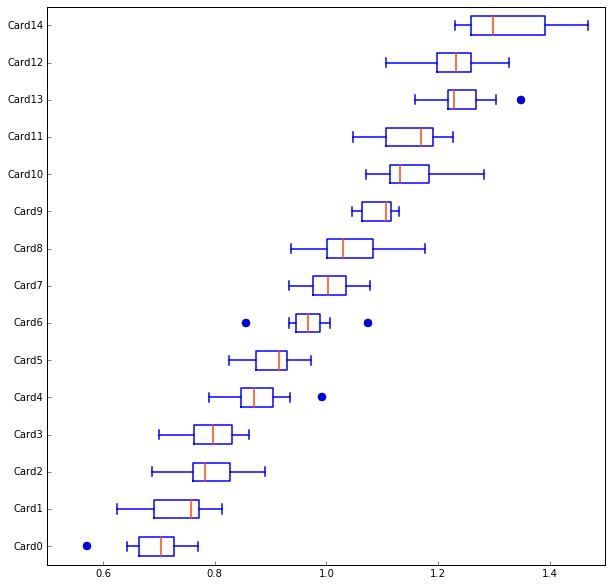

In [6]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
mpld3.disable_notebook()
#fig, ax1 = plt.subplots()
#fig.set_figheight(10)
bp1 = ax1.boxplot(df.T.as_matrix(), notch=False, vert=False, whis=1.5)
plt.setp(bp1['fliers'], color='OrangeRed', marker='o', markersize=8)
plt.setp(bp1['whiskers'], linestyle='-', linewidth=1.5)
plt.setp(bp1['caps'], color='Blue', linewidth=1.5)
plt.setp(bp1['medians'], color='OrangeRed', linewidth=1.5)
plt.setp(bp1['boxes'], linewidth=1.5)
ax1.set_yticklabels(df.index)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
plt.show()

# Interactive plot with plotly

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#poff.init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook


data = [dict() for x in range(len(df.index))]
for i in range(len(df.index)):
    data[i] = go.Box(x = df.iloc[i], name = df.index[i], marker=dict(color='#3D9970'))

layout = {
    'xaxis': {
        'title': 'normalized moisture',
        'zeroline': False,
    },
    'boxmode': 'group',
    'showlegend' : False
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plot(fig)

# Interactive plot with Bokeh

I cannot make this horizontal, and the order of the cards is not he same as in the input data.

In [19]:
df_flat = pd.DataFrame(df.stack())
df_flat.reset_index(inplace=True)
df_flat.columns = ['Card', 'Game', 'Score']
df_flat.head()

,Card,Game,Score
0,Card0,A,0.646983
1,Card0,B,0.571455
2,Card0,C,0.703941
3,Card0,D,0.641846
4,Card0,E,0.697395


In [20]:
from bokeh.charts import BoxPlot, output_file, show

p = BoxPlot(df_flat, values='Score', label='Card', title="Dummy title",
           legend = False)

output_file("boxplot.html")

show(p)

# Interactive plot with mpld3

Output html does not show the proper axis labels.

In [7]:
#tooltip = mpld3.plugins.PointLabelTooltip(bp1, labels=labels)
#mpld3.plugins.connect(fig, tooltip)
#mpld3.save_html(fig,"test.html")
#mpld3.disable_notebook()
mpld3.save_html(fig,"test.html")
mpld3.fig_to_html(fig,template_type="simple")
mpld3.enable_notebook()
mpld3.display()

'file:///home/rikard/WORK/IPythonNotebooks/temp-plot.html'